The following is associated with this study (https://doi.org/10.1038/s41586-022-05320-w) using the data availability section (https://idata.idiv.de/ddm/Data/ShowData/3514?version=9) as well as created using within the 'Code Availability' (https://github.com/idiv-biodiversity/ReSurveyGermany_Analysis)x

-----------

-----------

<header>
    <h1>Part 1</h1>

<b><big> Section 1</b></big>

The underlying data (ReSurveyGermany) uses multiple reviews that document plant species cover within specific land plots. This was the manipulated to calculate species change over time within plots (species_change_list2 and change).

<ul>
<li>In the underlying data ('ReSurveyGermany'), the <u> observations would be the land plots at that distinct time </u> (23641 unique 'PROJECT_ID_RELEVE_NR'). The <u>features</u> would be: the <u>count</u>(Cover_Perc) of the species within that plot; and what <u>layer</u> the plant is in (e.g. tree level vs shrub level)
    

<li>In the 'species_change_list2' dataframe, the <u>observations are still specific land plots</u>, however, it is over the measured time (7738 unique 'RS_PROJECT_PLOT' time-series). However, the <u>features</u> would be: <u>counts</u> of species <u>from specific time points</u> ('from.n' and 'to.n'; 'from' and 'to' respectively); <u>calculations about that species change</u> ('absolute_change', 'relative.change', 'relative.rank.change', 'absolute.change.colonizer', 'absolute.change.extinct', 'slope'); and <u>plot data</u> ('RS_PROJECT', 'RS_PLOT', 'mid.year', 'decade', 'end.decade')<ul>
    <li>The number of observations in this dataset (7738) is less than the original plot list (23641) as not all plots were followed up on. (i.e. 23641 vegetation records of plots, but only 7738 plots that were counted more than 1 time)
        </ul>
    
<li>In the 'change' dataframe, the <u>observations are the different species</u> observed in the plots (1794 species). The <u>features</u> are: the <u>total number count of a species</u> in the plots (n) (in terms of Cover Percentage); the <u>sum of plots that had an increase</u> in that species cover percentage (Pos); the sum of the plots that <u>had no change</u> (Equal); the sum that had a <u>negative change</u> (Neg); <u>mean change</u> of the species ('mean.absolute.change'); and <u>statistical measures on the data</u> ('est.binomial', 'conf.binom.minus', 'conf.binom.plus', 'p.values.binom', 'p.adjust').
    </ul>
    
The researchers in Jandt, et al. 2022 (linked above) were looking to determine how plant biodiversity within germany has changed over the past century by looking at local species cover (as opposed to global species counting).  The underlying data 'ReSurveyGermany' was used to look at intra-plot changes ('species_change_list2') and overall species changes across plots ('change'). Changes were then further extrapolated to look at how overall trends in biodiversity, showing that decremental coverage of species was more common than increased coverage of species.

Another question I would ask from this data is how abundance changed for well performing genus and poorly performing genus compared to all other species. This might provide more clarity to how certain groups were impacted rather than individual species.

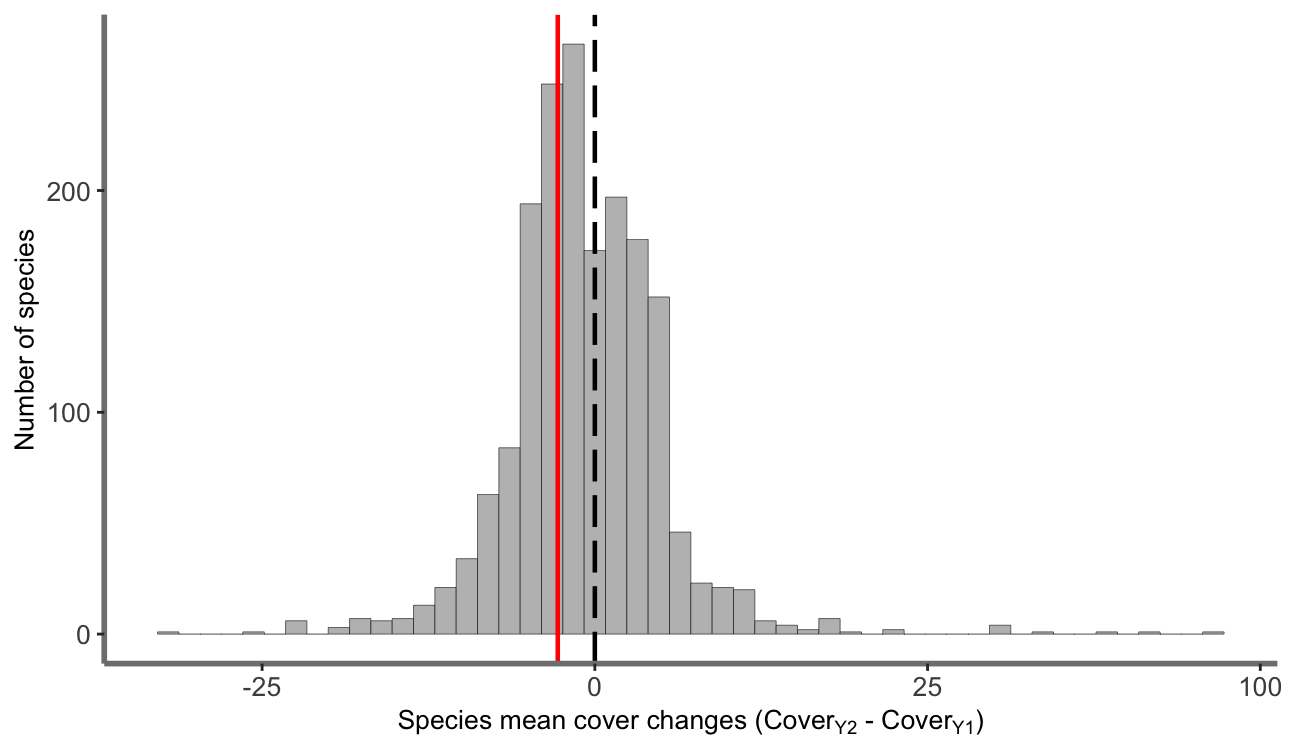

<b><big>Section 2a</b></big>
<ul>
    <li>This is a histogram with the change in mean species coverage on the x-axis, and the number of species that fall within the bin on the y-axis. It was generated using the 'mean.absolute.change' column in the 'change' dataframe.
    <li>The authors used this to highlight the overall trend in species mean coverage, with the black-dotted line indicating no change, while the red line shows the average mean change of all species. 
    <li>From this plot you can determine the overall trends in species cover changes. It indicates that most species have had a decrease in coverage change, however there are also a few that have done extremely well (>25). This indicates something from their conclusions that the 'winners' are disproportionately 'winning' and replacing other 'loser' species resulting in a decrease in biodiversity.
        </ul>

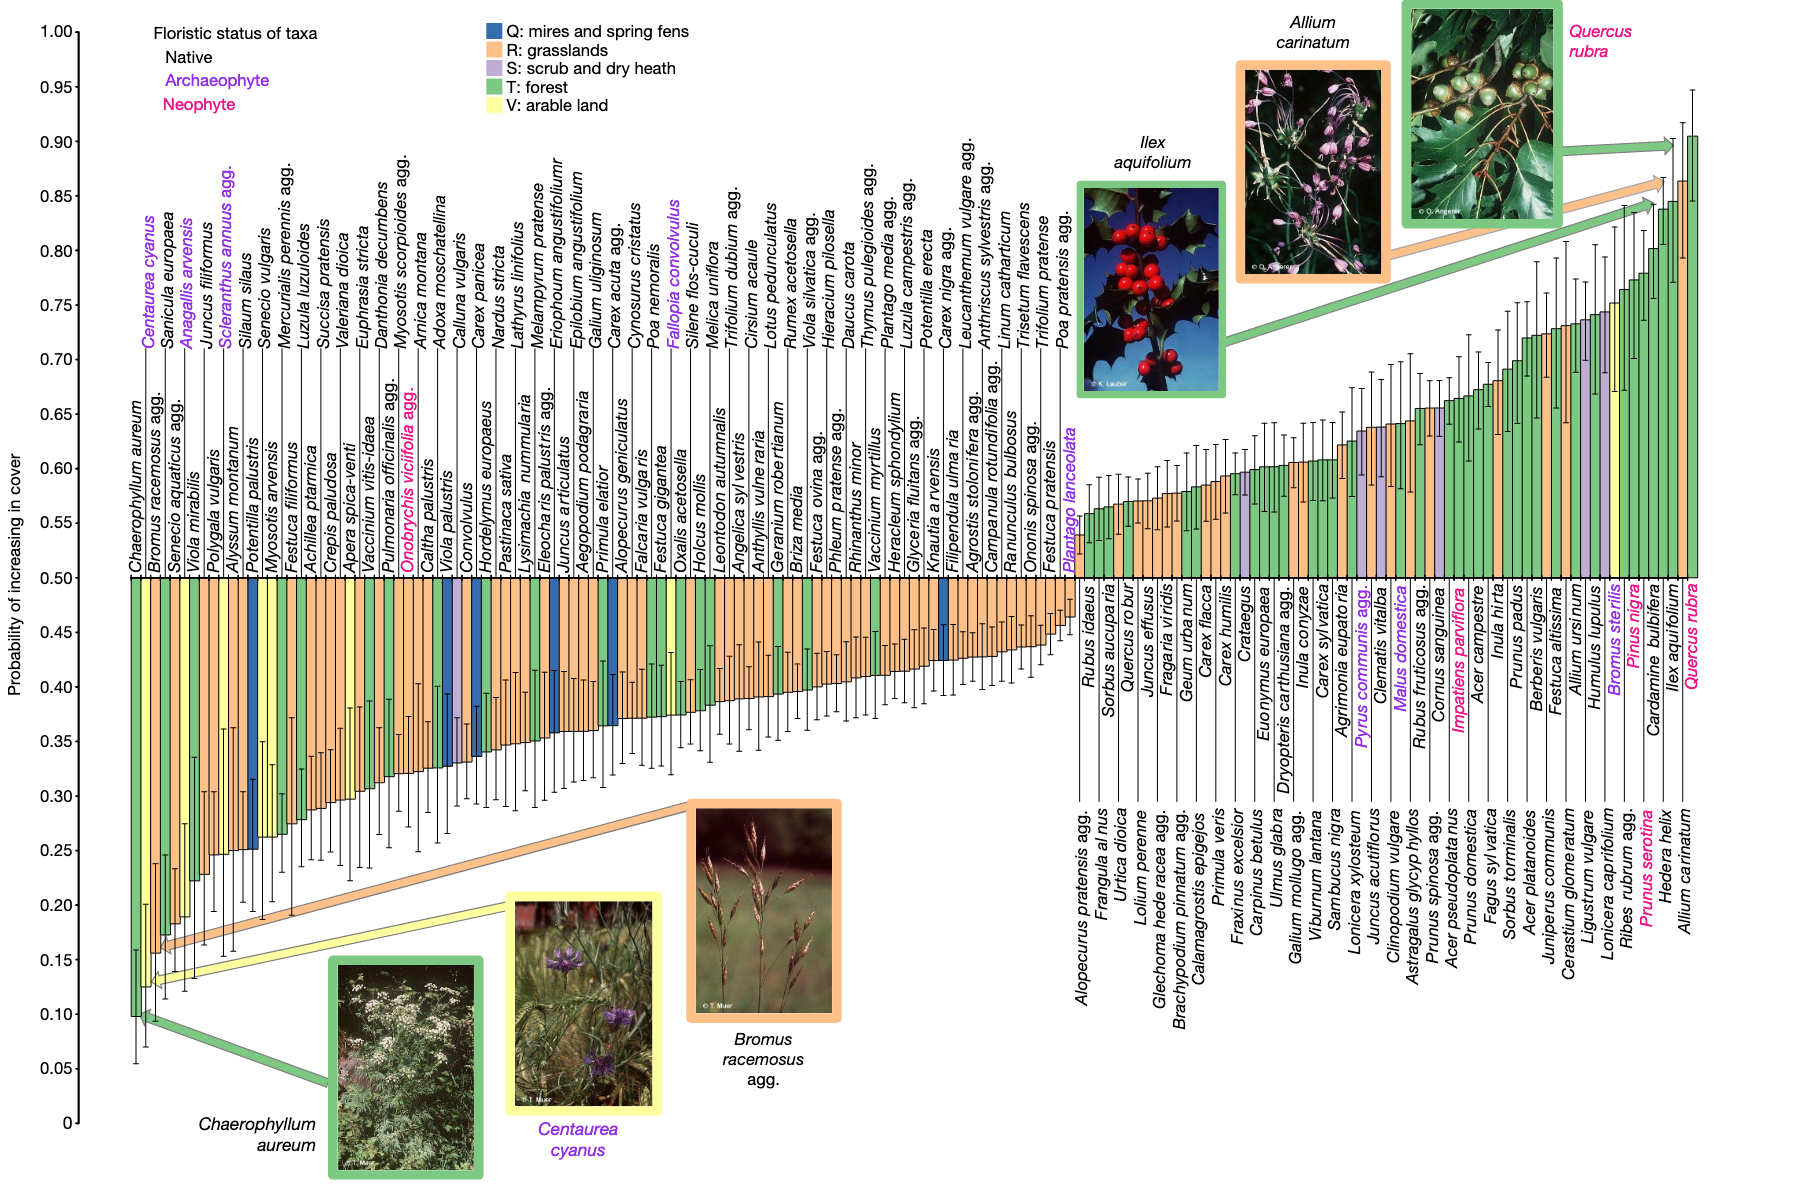

<b><big>Section 2b</b></big>
<ul>
    <li>This is a boxplot showing species from the 'change' dataset (filtered for n>100, p-val<.05) on the x-axis  and the probability that it increased in coverage on a selected plot of land on the y-axis. The colors of the bars represent the ecosystem the species is found in, while the color of the species name signifies the the 'nativeness' of the species. (Colors were added after the change data was used to generate the species-change bars)
    <li>The authors chose to include this to identify which species had increases/decreases in coverage in the past century, as well as the general ecosystem in which they come from.
    <li>From this figure you can; <ol>
        <li>Identify 'winner' and 'loser' species depending on if they have a probability greater or less than .5 of increasing.
        <li>Determine the general habitats which 'winners' and 'losers' come from. (e.g. forests are doing well, while grasslands are doing poorly)
        <li>Determine the 'nativeness' of the winner/loser species (e.g. 'winners' disproporotionately include 'invasive' species, while 'losers' are almost all 'native' species)
        


<b><big>Section 2c</b></big>
<ul>
    <li>Another figure I might include would be overall coverage changes based on ecotype (i.e. forrest versus plains). On the x-axis would be the category of ecotype, and then the y-axis would be the average change of species found within that ecotype. This would help further visualize what ecosystems have been altered the most in the past century

<b>Section 3

In [1]:
import pandas as pd
ReSurveyGermany=pd.read_csv('ReSurveyGermany.csv')

<ul>
    <li>The number of rows is 610313 and the number of columns is 6 columns. It was uploaded as a csv file.
    </ul>

In [2]:
species_change_list2=pd.read_csv('species.change.list2.csv', low_memory=False)

<ul>
    <li>The number of rows is 458311 and the number of columns is 17 columns. It was originally a dataframe generated from the ReSurveyGermany.csv, but I saved it as a csv to upload here.
    </ul>

In [3]:
change=pd.read_csv('change.csv')

-------

-------

<header>
    <h1>Part 2</h1>

<big><big><big>Section 1

<ul>
    <big><big><li>Obtain Data</big></big><ol>
    <li>The underlying data containing was downloaded from <a href="https://idata.idiv.de/ddm/Data/ShowData/3514?version=9"> this link</a> under the 'Primary Data' tab, named as 'ReSurveyGermany.zip'. This fileset contains a number of linked-datasets;<ul>
        <li>The 'Header_ReSurveyGermany.csv' file contains positional and temporal information of field plots in which the species abundance was documented.</li>
        <li>'ReSurveyGermany.csv' contains species-abundance records of various plots whose positional information is linked to the 'Header_ReSurveyGermany.csv' file via the 'PROJECT_ID_RELEVE_NR' column. </li>
        <li>'ReSurveyGermany_Project_List.csv' lists all source studies from which the original data was measured. It is linked to 'ReSurveyGermany.csv' as 'PROJECT_ID'</li>
        <li>'ReSurveyGermany_References.csv' Is the bibliological reference of the projects the data was collected from.</li> 
        </ul>
    <li> The 'species_change_list2' and 'change' dataframes were created by running the first 400 lines of 'SupplementaryCode1.txt' as an R-script. This file is available in the <a href="https://github.com/idiv-biodiversity/ReSurveyGermany_Analysis"> 'Code Availability'</a> section of the paper. These dataframes were then exported as .csv files with the R-command write.csv() in order for them to be loaded into this notebook.<ul>
        <li>Alternatively, due to the complexity of running this R-script, these files can be downloaded from following links for;</li><ul> 
        <li>the<a href="https://studentuml-my.sharepoint.com/:x:/g/personal/jonathan_forsyth_student_uml_edu/ESGsMezvhMRGmNFp5bdI4cYBI3b29wR2zQ_T0YmSk3zC5w?e=qFDZWc"> change.csv </a></li>
        <li>the<a href="https://studentuml-my.sharepoint.com/:x:/g/personal/jonathan_forsyth_student_uml_edu/EbGWCQNAyOJOig1BVYJIwq0BSY6wrCeqzNIIiPJELyuaqw?e=nMaBLd"> species_change_list2.csv </a></li>
        </ul>
        </ol>
    </ul>

<ul>
    <big><big><li>Load Data</big></big><ul>
     <li>All the dataframes were loaded in using the pd.read_csv() pandas-function which transforms comma seperated value (.csv) into dataframes.</li>
    <li>The 3 loaded dataframes represent a logical step-wise process by which the underlying survey data ('ReSurveyGermany') was transformed into change in species abundance over time ('change').</li><ol>
    <li>'ReSurveyGermany' contains species abundance counts within specific plots at distinct time points (linked by 'PROJECT_ID_RELEVE_NR' feature to positional and temporal metadata contained in the 'Header_ReSurveyGermany.csv')</li>
    <li>'species_change_list2' contains intra-plot comparisons across various time points. </li>
    <li>'change' contains the overall trend of all plot-comparisons of a species in 'species_change_list2' by which 'n' is the total number of time comparisons and 'pos', 'equal', and 'neg' represent the general change in species abundance within the time comparison</li>
    </ol>
            

In [4]:
import pandas as pd
ReSurveyGermany=pd.read_csv('ReSurveyGermany.csv')
ReSurveyGermany

,PROJECT_ID,RELEVE_NR,PROJECT_ID_RELEVE_NR,LAYER,TaxonName,Cover_Perc
0,1,21123,1_21123,4,Acer platanoides,1.0
1,1,21123,1_21123,1,Acer pseudoplatanus,38.0
2,1,21123,1_21123,6,Aegopodium podagraria,13.0
3,1,21123,1_21123,6,Alliaria petiolata,1.0
4,1,21123,1_21123,6,Allium ursinum,13.0
...,...,...,...,...,...,...
610308,92,858,92_858,4,Salix aurita,3.0
610309,92,858,92_858,6,Salix aurita,1.0
610310,92,858,92_858,6,Sorbus aucuparia,1.0
610311,92,858,92_858,6,Vaccinium myrtillus,3.0


In [5]:
species_change_list2=pd.read_csv('species.change.list2.csv', low_memory=False)
species_change_list2

,RS_PROJECT,RS_PLOT,from.n,to.n,from,to,species,absolute.change,relative.change,relative.rank.change,absolute.change.colonizer,absolute.change.extinct,mid.year,decade,end.decade,slope,RS_PROJECT_PLOT
0,Ahrns_Hofmann,Adoxo-Aceretum pseudoplatani,2,2,1963,1995,Acer platanoides,18.96345,0.974311,-0.650000,NaN,NaN,1979,1970,1990,0.030447,Ahrns_Hofmann_Adoxo-Aceretum pseudoplatani
1,Ahrns_Hofmann,Adoxo-Aceretum pseudoplatani,2,2,1963,1995,Acer pseudoplatanus,-2.35830,-0.115039,0.000000,NaN,NaN,1979,1970,1990,-0.003595,Ahrns_Hofmann_Adoxo-Aceretum pseudoplatani
2,Ahrns_Hofmann,Adoxo-Aceretum pseudoplatani,2,2,1963,1995,Aegopodium podagraria,-10.00000,-0.769231,0.166667,NaN,NaN,1979,1970,1990,-0.024038,Ahrns_Hofmann_Adoxo-Aceretum pseudoplatani
3,Ahrns_Hofmann,Adoxo-Aceretum pseudoplatani,2,2,1963,1995,Alliaria petiolata,1.00000,0.333333,-0.033333,NaN,NaN,1979,1970,1990,0.010417,Ahrns_Hofmann_Adoxo-Aceretum pseudoplatani
4,Ahrns_Hofmann,Adoxo-Aceretum pseudoplatani,2,2,1963,1995,Allium ursinum,62.50000,0.827815,-0.150000,NaN,NaN,1979,1970,1990,0.025869,Ahrns_Hofmann_Adoxo-Aceretum pseudoplatani
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458306,Bohn_Rotes_Moor,275,1,1,1986,1987,Salix caprea,-0.50000,-1.000000,0.393939,NaN,-0.5,1987,1980,1980,-1.000000,Bohn_Rotes_Moor_275
458307,Bohn_Rotes_Moor,275,1,1,1986,1987,Sorbus aucuparia,0.49750,0.497500,-0.060606,NaN,NaN,1987,1980,1980,0.497500,Bohn_Rotes_Moor_275
458308,Bohn_Rotes_Moor,275,1,1,1986,1987,Stellaria alsine,0.50000,1.000000,-0.393939,0.5,NaN,1987,1980,1980,1.000000,Bohn_Rotes_Moor_275
458309,Bohn_Rotes_Moor,275,1,1,1986,1987,Vaccinium myrtillus,0.00000,0.000000,0.060606,NaN,NaN,1987,1980,1980,0.000000,Bohn_Rotes_Moor_275


In [6]:
change=pd.read_csv('change.csv')
change

,species,n,pos,equal,neg,est.binom,conf.binom.minus,conf.binom.plus,p.values.binom,mean.absolute.change,p.adjust
0,Acer platanoides,865,501,169,195,0.719828,0.684861,0.752918,6.370146e-32,0.807317,1.140256e-28
1,Acer pseudoplatanus,2387,1284,449,654,0.662539,0.640995,0.683589,3.994240e-47,1.698547,7.157678e-44
2,Aegopodium podagraria,525,157,88,280,0.359268,0.314226,0.406229,4.256046e-09,-5.314084,7.243791e-06
3,Alliaria petiolata,495,175,120,200,0.466667,0.415277,0.518586,2.151598e-01,-0.373031,1.000000e+00
4,Allium ursinum,630,318,196,116,0.732719,0.688436,0.773797,8.056537e-23,6.167009,1.433258e-19
...,...,...,...,...,...,...,...,...,...,...,...
1789,Amaranthus blitoides,6,3,0,3,0.500000,0.118117,0.881883,1.000000e+00,0.000000,1.000000e+00
1790,Portulaca oleracea,7,3,1,3,0.500000,0.118117,0.881883,1.000000e+00,0.000000,1.000000e+00
1791,Amaranthus powellii,4,2,0,2,0.500000,0.067586,0.932414,1.000000e+00,0.000000,1.000000e+00
1792,Betula carpatica,32,13,11,8,0.619048,0.384354,0.818928,3.833103e-01,1.233481,1.000000e+00


<ul>
    <big><big><li>Clean Data</big></big><ul>
    <li>The authors went through several cleaning steps within the R-script 'SupplementaryCode1.txt' while transforming 'ReSurveyGermany' into 'change'.</li> <ol>
    <li>Plots were removed if it was only counted within 1 year (i.e. not able to be compared through time). </li> <ul>
    <li>Species counted within these plots were then also removed from the change dataset baed on if their names appeared within the species-list within the new selected subset of plots.</li>
    </ul>
    <li>As the name may suggest, 'species_change_list2' is a cleaned form of an original 'species_change_list' dataset, species comparisons in that plot were not able to be made.</li><ul>
    <li>This is an artifact of the looping method they used in comparing plots by year. They looped through each year the plot was noted, but you cannot calculate change from 0 to 0 <sub>(This is my interpretation of why they chose to remove these NA values).</sub></li>
    </ul>
    </ol>
    <li>To verify the cleaning and structure of the dataframes I ran the following lines of code;</li>
    </ul>
        

In [7]:
len(species_change_list2['RS_PROJECT'].unique())

92

<ul>
    <ul>
        <ul>
            <li>This line verifies all projects in 'ReSurveyGermany' are included in the 'species_change_list2' dataframe.</li>
        </ul>
    </ul>
</ul>

In [8]:
change['n'].sum()

458311

<ul>
    <ul>
        <ul>
            <li>This line verifies the time comparison for all species is included in the 'n' count of plots. This values matches the number of rows within the 'species_change_list2' dataframe, indicating that all were included.</li>
        </ul>
    </ul>
</ul>

<big><big><big>Section 2

<ul>
    <big><big><li>Obtain Shape(s)</big></big>

In [9]:
ReSurveyGermany.shape

(610313, 6)

<ul>
    <ul>
    <big><li>Describe how this shape relates to the number of observations and the number of features.</li></big>
        <ul>
            <li>The 610313 rows represent all organsisms observed within any plot during the time period of the study (~100yrs). </li>
            <li>The 6 columns contain;</li>
            <ul>
                <li>Temporal/Positional information of the observed plot in 'PROJECT_ID_RELEVE_NR' column (metadata in 'Header_ReSurveyGermany.csv') which is further split up into the original project ('PROJECT_ID') and the specific identifier for the plot within that project ('RELEVE_NR').</li>
                <li>Species observations within the plot in the 'TaxonName' column and the abundance of that species within the plot in the 'Cover_Perc' column.</li>
                <li>Ecological information about the species observed in the 'LAYER' column</li>
            </ul>
            <li>Generally speaking, all of this above information are 'features' of the 23641 unique plot measurements (observations) across 7738 semi-permanent plots covered in 92 different projects.   </li>
        </ul>
    </ul>
</ul

In [10]:
species_change_list2.shape

(458311, 17)

<ul>
    <ul>
    <big><li>Describe how this shape relates to the number of observations and the number of features.</li></big>
        <ul>
            <li>The 458311 rows represent intra-plot comparisons over every permutation of years when the plot was measured, for every species.</li> 
            <ul>
                <li>In other words, there is 7738 unique plots (measured in 2+ years) in which the species comparisons are made for every year.</li>
            </ul>
            <li>The 17 columns includes;</li>
            <ul>
                <li>Positional information (within the linked metadata) about the plot in 'RS_PROJECT', 'RS_PLOT', and 'RS_PROJECT_PLOT'</li>
                <li>Temporal information about the intra-plot comparison in 'from', 'to', 'mid.year', 'decade', and 'end.decade'</li>
                <li>The species being compared in the intra-plot comparison in 'species'</li>
                <ul>
                <li>Various metrics of change in species abundance in 'from.n', 'to.n', 'absolute.change', 'relative.change', 'relative.rank.change', 'absolute.change.colonizer', 'absolute.change.extinct', and 'slope'</li>
                </ul>
            </ul>
        </ul>
    </ul>
</ul>

In [11]:
change.shape

(1794, 11)

<ul>
    <ul>
    <big><li>Describe how this shape relates to the number of observations and the number of features.</li></big>
        <ul>
            <li>The 1794 rows here represent the number of species observed in all of the plots in the past ~100years. (Observations)</li>
            <li>The 11 columns (which are all features of the observed species) are as follows:</li>
            <ul>
                <li>'n' is the total number of intra-plot comparisons the species was counted in.</li>
                <li>'pos' is the sum of intra-plot comparisons where the species abundance increased</li>
                <li>'equal' is the sum of the intra-plot where the species had no change in abundance</li>
                <li>'neg' is the sum of the intra-plot where the species had a decrease in abundance</li>
                <li>'est.binom' is an estimated probability of success of the binomial</li>
                <li>'conf.binom.minus', 'conf.binom.plus', and 'p.values.binom' are statistical confidences in the distribution of the species coverage in the distinct timepoints.</li>
                <li>'mean.absolute.change' is the average absolute change of the species across the plots in time (calculated from different dataset) </li>
                <li>'p.adjust' is a 'holm' adjusted p-value of 'p.values.binom' </li>
        </ul>
    </ul>
</ul>

<ul>
    <big><big><li>Pick two features to investigate.</big></big></li>
    <ul>
    <big><li>'Pos' Feature within 'Change' dataframe</li></big>
    <ul>
        <li>Prediction</li>
        <ul>
            <li>Expect all 1794 species to have a count value (0 through the max observations)</li>
            <li>Would expect most to not have any positive simply due to most species only being observed once, while a few will be observed in almost every plot</li>
            <li>Expect the average to be closer to 0 than the max due to how often 0 occurs, and because most species decreased</li>
        </ul>
    </ul>
</ul>
</ul>

In [12]:
change['pos'].describe()

count    1794.000000
mean       92.841137
std       233.279849
min         0.000000
25%         2.000000
50%        11.000000
75%        64.000000
max      2514.000000
Name: pos, dtype: float64

<ul>
    <ul>
    <ul>
        <li>Explanation</li>
        <ul>
            <li>As I expected, all 1794 species had a count for 'pos'. This intuitively makes sense as even if a species was never found to increase in an intra-plot comparison, it would still have a value of 0.</li>
            <li>25% of species increased in 2 or less intra-plot comparisons and 50% of species increased in 11 or less intra-plot comparisons, while the mean is ~92 intra-plot increases. This indicates that the majority of increases are only by a few species, while 50% saw little-to-no increase. However, I don't believe my original prediction of most species only being counted once as an accurate prediction.</li>
            <li>The average is much higher than I originally predicted as species that increased in plots raised the mean</li>

<ul>
    <ul>
        <big><li>'mean.absolute.change' Feature within 'Change' dataframe</li></big>
        <ul>
            <li>Prediction</li>
            <ul>
                <li>Expect all 1794 species to have a count value (0 through the max observations)</li>
                <li>Would expect it to have a negative average (as most species decreased)</li>
            </ul>
        </ul>
    </ul>
</ul>

In [13]:
change['mean.absolute.change'].describe()

count    1794.000000
mean       -0.095281
std         4.585757
min       -40.000000
25%        -0.628146
50%        -0.062516
75%         0.276280
max        88.000000
Name: mean.absolute.change, dtype: float64

<ul>
    <ul>
    <ul>
        <li>Explanation</li>
        <ul>
            <li>As I expected, all 1794 species had a count for 'mean.absolute.change' as there can be any change in abundance negative or positive</li>
            <li>In addition, as we expected 'mean.absolute.change' is also negative as we expect species abundance to have generally decreased            

<big><big><big>Section 3

<ul>
    <big><big><li>Basic univariate visualizations.</big></big></li>
    <ul>
    <big><li>'Pos' Feature within 'Change' dataframe</li></big>
    <ul>
        <li>Describe what kind of visualization you want to make</li>
        <ul>
            <li>A histogram showing the distributions of the number of times a species had a positive increase in an intra-plot comparison</li>
        </ul>
        <li>Why this is appropriate for this feature and data set</li>
        <ul>
            <li>Understanding the distribution of how most species are counted (which 'pos' would partially represent, although 'n' would be better for this purpose) is important for interpreting how abundance may change (i.e. why are some showing up in 'pos' plots more often than others.)</li>
        </ul>
        <li>How the visualization will provide insight into the data.</li>
        <ul>
            <li>Visualizing the distribution for 'pos' across species may help distinguish abundantly available species from species found in only a few plots (which the majority of species are).</li>
        </ul>
    </ul>
    </ul
</ul>
    

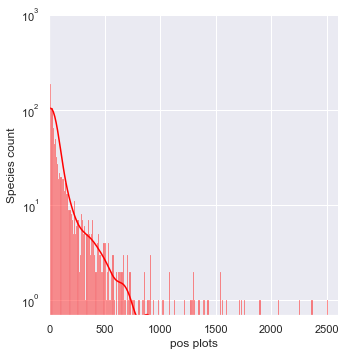

In [14]:
import seaborn as sns #Imports seaborn for graphs
sns.set_theme()
import matplotlib.pyplot as plt #imports matplot for editing axis and adding lines
%matplotlib inline
sns.set_theme() #Sets the theme of seaborn
pos_plot=sns.displot(data=change, x='pos', log_scale=(0,10), color='red', kde=True) #Creates a histogram looking at the distribution of 'pos' across all species, with the count (y-axis) on a log10 scale.
pos_plot=pos_plot.set_axis_labels('pos plots', 'Species count').set(xlim=(0,2600),ylim=(.7,1000)) #Creates labels and adjusts the x-scales to make it more readable

<ul>
    <ul>
    <ul>
        <li>Interpret the visualization: compare it to the "describe" function output from Section 2, and explain what insight into the data you can make with the visualization.</li>
        <ul>
            <li>Most species are bunched near 0, which is what we expected compared to the describe function, as 50% of species saw less than 11 intra-plot increases over time and 25% had less than 2. From this plot you can see that most species do not have a large number of intra-plot comparisons in which they increased in abundance, while a few had extremely high number of plots that they increased in number. </li>
        </ul>
        <li>Describe how your visualization relates to one of the hypotheses or figures from the paper.</li>
        <ul>
            <li>This plot visualizes the distribution of positive intra-plot comparisons for species across time. Most species had a very small number of plots where they increased, while a few had major numbers of plots where they increased, which explains why there may be a general loss of diversity as some species out-compete others for space within these plots. This would be important to the hypothesis of the paper which was looking at how species richness has changed over the past century.  </li>
        </ul>
    </ul>
    </ul
</ul>

<ul>
    <ul>
    <big><li>'mean.absolute.change' Feature within 'Change' dataframe</li></big>
    <ul>
        <li>Describe what kind of visualization you want to make</li>
        <ul>
            <li>A histogram showing the distributions of the mean absolute change a species underwent across all plots.</li>
        </ul>
        <li>Why this is appropriate for this feature and data set</li>
        <ul>
            <li>Plotting distribution mean change is appropriate as it allows us to see overall change trends across all species </li>
        </ul>
        <li>How the visualization will provide insight into the data.</li>
        <ul>
            <li>Looking at the distribution of mean change allows us to quantify how many species are losing abundance vs gaining abundance.</li>
        </ul>
    </ul>
    </ul
</ul>
    

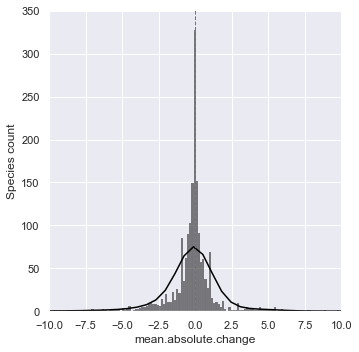

In [15]:
mean_absolute_change_plot=sns.displot(data=change, x='mean.absolute.change', kde=True, color='black') #Plots the distribution of mean.absolute.change for each species
mean_absolute_change_plot=mean_absolute_change_plot.set_axis_labels('mean.absolute.change', 'Species count').set(xlim=(-10,10),ylim=(0,350)) #Adjusts the axes (For read-ability)
plt.axvline(x=0, ymin=0, ymax = 350, linewidth=1, color='r', linestyle='dashed') #Creates a vertical dashed line centered at 0 (no-change)

<ul>
    <ul>
    <ul>
        <li>Interpret the visualization: compare it to the "describe" function output from Section 2, and explain what insight into the data you can make with the visualization.</li>
        <ul>
            <li>The distribution of the mean absolute change centers very closesly around 0 but has slightly more species with negative change. This is what we expected from the describe function, which had a mean of -.09, but had 25% with a mean change below -.62 while  75% had a mean change less than .27 indicating that the plot is slightly negative shifted. A negative-shifted plot indicates that most species are losing in species abundance over time. </li>
        </ul>
        <li>Describe how your visualization relates to one of the hypotheses or figures from the paper.</li>
        <ul>
            <li>This plot (which is similar to the first plot in pt1, which only includes species counted in n>100 plots) measures overall change various species abundance over time, which relates to the core purpose of quantifying how species richness in germany has changed over the past century.  </li>
        </ul>
    </ul>
    </ul
</ul>
    

------------------------
------------------------

<header>
    <h1>Part 3</h1>

<big><big><big>Question 1

- Describe the question you are asking and why it is interesting? 
    
    - I want to compare how species within the genus 'Carex' and species within the genus 'Prunus' did over the course of the study compared to all other species (with a p-val<.05). Carex is a grassland plant genus, and the grassland ecotype appeared to be the most adversely impacted (in figure 2 of part 1). 'Prunus' is a genus of trees/shrubs that belong to the forrest ecotype, which appeared to benefit over the course of the study.

- What is your specific hypothesis?

    - I expect Prunus to have a significantly higher abundance change when compared to all other species (because this has only a slightly below average change), and Carex to have a significantly lower abundance change when compared to all other species.

- How does it relate to the research question or the question you came up with?

    - The original question I asked was looking at how well performing genus and poorly performing genus change rates compared to all combined genus change rates. This would be difficult to do and compare for all genus included, so I decided to compare 2.


- Describe why this data is appropriate to answer this question (such as: Because there are a range of plants with different fruit lengths and different values of this genotype measured). 

    - Because there multiple species within the 'Carex' and 'Prunus' genus, some of which had noticeable negative and/or positive changes that can be attributed to their ecotype, and are likely different from the background rates of all genus.

- Describe which features you are using and how many observations there are for each

    - Subsetting the 'change' dataframe by 'species' containing 'Carex' or 'Prunus' and filtering by 'p.adjust' <.05 then will look at mean.absolute changes for each. The number of observations ('species') using this criteria is 10 for Carex, 4 for Prunus, and 181 for 'Neither' (all genus besides Carex and Prunus).


In [197]:
Prunus=change[change['species'].str.contains('Prunus') & (change['p.adjust']<.05)] #Subsets all species within prunus with an adjusted pval<.05
Prunus['PRorCA']='Prunus' #Sets the genus to sort by later
Prunus

/var/folders/42/08t14pcs1v70svtftf53hcmc0000gn/T/ipykernel_29463/2082275596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prunus['PRorCA']='Prunus' #Sets the genus to sort by later


,species,n,pos,equal,neg,est.binom,conf.binom.minus,conf.binom.plus,p.values.binom,mean.absolute.change,p.adjust,PRorCA
107,Prunus spinosa agg.,1896,906,514,476,0.655572,0.629847,0.680633,2.727772e-31,1.860940,4.877257e-28,Prunus
177,Prunus padus,335,195,56,84,0.698925,0.641392,0.752174,2.490065e-11,3.328820,4.310303e-08,Prunus
717,Prunus serotina,438,321,26,91,0.779126,0.735922,0.818268,3.731812e-31,4.321443,6.668748e-28,Prunus
904,Prunus domestica,316,180,46,90,0.666667,0.606987,0.722640,4.610620e-08,1.666503,7.773505e-05,Prunus


In [111]:
Carex=change[change['species'].str.contains('Carex') & (change['p.adjust']<.05)] #Subsets all species within carex with an adjusted pval<.05
Carex['PRorCA']='Carex' #Sets the genus to sort by later
Carex

/var/folders/42/08t14pcs1v70svtftf53hcmc0000gn/T/ipykernel_29463/3798170084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Carex['PRorCA']='Carex'


,species,n,pos,equal,neg,est.binom,conf.binom.minus,conf.binom.plus,p.values.binom,mean.absolute.change,p.adjust,PRorCA
13,Carex sylvatica,1006,422,312,272,0.608069,0.570632,0.644584,1.367829e-08,0.846642,2.318470e-05,Carex
69,Carex flacca,1272,520,383,369,0.584927,0.551737,0.617552,4.596761e-07,0.340263,7.658205e-04,Carex
387,Carex acuta agg.,506,160,67,279,0.364465,0.319351,0.411418,1.465440e-08,-3.333867,2.480989e-05,Carex
395,Carex nigra agg.,1232,392,308,532,0.424242,0.392120,0.456850,4.626621e-06,-1.045969,7.564525e-03,Carex
401,Carex × elytroides,42,29,9,4,0.878788,0.717984,0.965967,1.092860e-05,3.952381,1.771527e-02,Carex
425,Carex panicea,564,150,118,296,0.336323,0.292568,0.382266,4.282567e-12,-0.997444,7.443102e-09,Carex
692,Carex dioica,16,0,0,16,0.000000,0.000000,0.205907,3.051758e-05,-2.218750,4.885864e-02,Carex
697,Carex pseudocyperus,45,38,1,6,0.863636,0.726493,0.948269,9.430375e-07,5.211111,1.559784e-03,Carex
760,Carex diandra,26,2,1,23,0.080000,0.009840,0.260306,1.943111e-05,-4.884615,3.122580e-02,Carex
906,Carex humilis,1440,499,599,342,0.593341,0.559269,0.626757,6.875679e-08,0.529648,1.157177e-04,Carex


In [112]:
non_PorC=change[-(change['species'].str.contains('Prunus')) & -(change['species'].str.contains('Carex')) & (change['p.adjust']<.05)] #Subsets all species not within carex or prunus and have an adjusted p-val<.05
non_PorC['PRorCA']='Neither' #Sets the genus to sort by later
non_PorC #Prints for visibility

/var/folders/42/08t14pcs1v70svtftf53hcmc0000gn/T/ipykernel_29463/4055611522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_PorC['PRorCA']='Neither'


,species,n,pos,equal,neg,est.binom,conf.binom.minus,conf.binom.plus,p.values.binom,mean.absolute.change,p.adjust,PRorCA
0,Acer platanoides,865,501,169,195,0.719828,0.684861,0.752918,6.370146e-32,0.807317,1.140256e-28,Neither
1,Acer pseudoplatanus,2387,1284,449,654,0.662539,0.640995,0.683589,3.994240e-47,1.698547,7.157678e-44,Neither
2,Aegopodium podagraria,525,157,88,280,0.359268,0.314226,0.406229,4.256046e-09,-5.314084,7.243791e-06,Neither
4,Allium ursinum,630,318,196,116,0.732719,0.688436,0.773797,8.056537e-23,6.167009,1.433258e-19,Neither
12,Cardamine bulbifera,434,279,86,69,0.801724,0.755900,0.842327,4.560223e-31,1.084442,8.144559e-28,Neither
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,Festuca altissima,220,126,47,47,0.728324,0.655593,0.793053,1.581324e-09,4.651288,2.704064e-06,Neither
1325,Ilex aquifolium,161,109,32,20,0.844961,0.770760,0.902651,5.072229e-16,2.740341,8.942339e-13,Neither
1367,Lonicera caprifolium,435,206,158,71,0.743682,0.688019,0.794049,2.022744e-16,0.502299,3.572166e-13,Neither
1513,Minuartia sedoides,23,23,0,0,1.000000,0.851815,1.000000,2.384186e-07,0.956522,3.988743e-04,Neither


In [113]:
PC_Combined=pd.concat([Prunus, Carex, non_PorC], axis=0, join='inner') #Combines the 3 dataframes
PC_Combined

,species,n,pos,equal,neg,est.binom,conf.binom.minus,conf.binom.plus,p.values.binom,mean.absolute.change,p.adjust,PRorCA
107,Prunus spinosa agg.,1896,906,514,476,0.655572,0.629847,0.680633,2.727772e-31,1.860940,4.877257e-28,Prunus
177,Prunus padus,335,195,56,84,0.698925,0.641392,0.752174,2.490065e-11,3.328820,4.310303e-08,Prunus
717,Prunus serotina,438,321,26,91,0.779126,0.735922,0.818268,3.731812e-31,4.321443,6.668748e-28,Prunus
904,Prunus domestica,316,180,46,90,0.666667,0.606987,0.722640,4.610620e-08,1.666503,7.773505e-05,Prunus
13,Carex sylvatica,1006,422,312,272,0.608069,0.570632,0.644584,1.367829e-08,0.846642,2.318470e-05,Carex
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,Festuca altissima,220,126,47,47,0.728324,0.655593,0.793053,1.581324e-09,4.651288,2.704064e-06,Neither
1325,Ilex aquifolium,161,109,32,20,0.844961,0.770760,0.902651,5.072229e-16,2.740341,8.942339e-13,Neither
1367,Lonicera caprifolium,435,206,158,71,0.743682,0.688019,0.794049,2.022744e-16,0.502299,3.572166e-13,Neither
1513,Minuartia sedoides,23,23,0,0,1.000000,0.851815,1.000000,2.384186e-07,0.956522,3.988743e-04,Neither


- Visualization: related to the same research question
    - Describe what kind of plot you choose to make to get insight into this question and why this plot can help give insight. 
        - Violin plot of mean.absolute.change displaying a histogram of the 2 different genus and all combined genus.
    - What do you expect to see?
        - Most species being neutral or negative for Carex, and most species being neutral or positive for Prunus, while the background rate should be centered slightly below 0.
    - How will the result inform your hypothesis? 
        - Viewing the distribution of both genuses will allow us to determine which had substantial abundance changes when compared to all other genus.
        

<AxesSubplot:xlabel='PRorCA', ylabel='mean.absolute.change'>

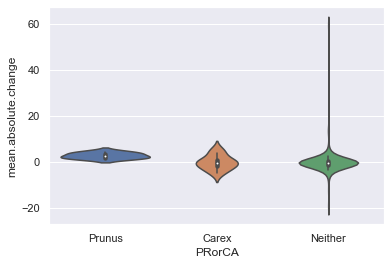

In [106]:
sns.violinplot(data=PC_Combined, x='PRorCA', y='mean.absolute.change')
#Creates a violin plot of mean.absolute.change based on being within the 'Prunus' or 'Carex' genus and having a p-val of <.05

- Interpret the plot: how does the plot allow you to assess your hypothesis? What do you conclude by looking at this.
    - My hypothesis was that Prunus would have a higher change than the other genus, while Carex would have a lower change than the other genus. From this plot we can eyeball that Prunus does have a higher change, while it doesn't appear Carex has a lower abundance change.
    - We can conclude the 'Carex' genus had mostly normal distribution around a negative mean, indicating that most of the species had a neutral or negative change in abundance, while there were some with a positive change as well. All species in the 'Prunus' genus had a positive trend in abundance. From this it can be extrapolated that the Prunus has performed better when compared to other genus, while it isn't as clear how Carex has performed compared to other genus.

- Model: follow up on your visualization with  model of the data
    - What feature(s) are you modeling and why is this model appropriate for that? 
        - 'Mean absolute change' for Carex and Prunus and all other Genus. It's appropriate because the two genuses are discrete (i.e. 1 or 0) and have unique changes in abundance.
    - What other feature(s) are used in the model, if any, and why are they included?
        - I filtered by p-val<.05 to get rid of lowly confident results.
    - Describe what model you intend to make and why: how will this model inform your hypothesis. What kind of parameters do you expect for your model, based on your visualization?
        - A normal model for each genus (Carex, Prunus, and other Genus), as each appeared to have normal distributions at different scales and locs for mean absolute change. This will inform my hypothesis because it will calculate and predict the mean absolute change for each genus. For 'Carex' I expect a normal model with a loc slightly below 0, and a scale of around 3. For 'Prunus' I expect a loc of ~2.5 and a scale of ~1. For the other Genus, I expect the value to be slightly below 0 (the authors found a slightly negative average change of all species) with a wide scale as it's accounting for more groups that have different changes.
    - Provide code to run the model and view the numerical results. Again, the code should both work as written, and be explained. 


Prunus Mean 2.7944267264568476 Std 1.2597571857631809
Carex Mean -0.16005997970364852 Std 3.08436642979828
Neither Genus Mean -0.09747508985469408 Std 5.2413070914933675


<AxesSubplot:>

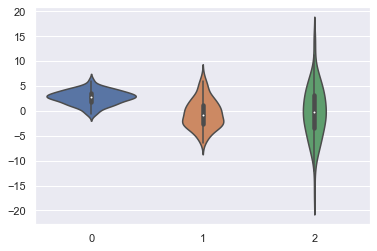

In [198]:
import numpy as np
from scipy.stats import bernoulli, norm
c_loc=Carex['mean.absolute.change'].mean() #Using the mean as the center of the carex model
c_scale=Carex['mean.absolute.change'].std() #Using the standard deviation as the scale for the carex model
c_model=norm(loc=c_loc, scale=c_scale) #Creates a normal model
c_gen_data=c_model.rvs(100) #Creating 100 species

p_loc=Prunus['mean.absolute.change'].mean() #Using the mean as the center of the prunus model
p_scale=Prunus['mean.absolute.change'].std() #Using the standard deviation as the scale for the prunus model
p_model=norm(loc=p_loc, scale=p_scale)
p_gen_data=p_model.rvs(100) #Creating 100 species

n_loc=non_PorC['mean.absolute.change'].mean() #Using the mean as the center of the niether model
n_scale=non_PorC['mean.absolute.change'].std() #Using the standard deviation as the scale for the neither model
n_model=norm(loc=n_loc, scale=n_scale)
n_gen_data=n_model.rvs(100) #Creating 100 species


print("Prunus", "Mean",p_loc, "Std", p_scale)
print("Carex", "Mean",c_loc, "Std", c_scale)
print("Neither Genus", "Mean",n_loc, "Std", n_scale)
sns.violinplot(data=(p_gen_data, c_gen_data, n_gen_data)) #Creates a violin plot of the 2 generated models (0=Carex, 1=Prunus)

In [209]:
print('Generated Prunus mean:', p_gen_data.mean(), '/ Generated Prunus Std:', p_gen_data.std())
print('Generated Carex mean:', c_gen_data.mean(), '/ Generated Carex Std:', c_gen_data.std())
print('Generated Neither mean:', n_gen_data.mean(), '/ Generated Neither Std:', n_gen_data.std())

Generated Prunus mean: 2.7218594073931905 / Generated Prunus Std: 1.412343774470873
Generated Carex mean: -0.5197986383972288 / Generated Carex Std: 2.8759790648929093
Generated Neither mean: -0.1685670748530552 / Generated Neither Std: 5.303188080927049


In [208]:
import scipy.stats
print('Prunus T-Test Statistic:', scipy.stats.ttest_ind(p_gen_data, n_gen_data).statistic,
      '/ P-Value:', scipy.stats.ttest_ind(p_gen_data, n_gen_data).pvalue) #T-test for the differences of Prunus from background (Neither)
print('Carex T-Test Statistic:', scipy.stats.ttest_ind(c_gen_data, n_gen_data).statistic,
      '/ P-Value:', scipy.stats.ttest_ind(c_gen_data, n_gen_data).pvalue) #T-test for the differences of Carex from background (Neither)

Prunus T-Test Statistic: 5.2403792734801895 / P-Value: 4.0873994519110234e-07
Carex T-Test Statistic: -0.5792818454439128 / P-Value: 0.5630574822847803


- Interpret the numerical results of the model:
    - What can we conclude about the parameters of the model, and how certain/uncertain are we about them. 
        - We used the actual data parameters to create both models so the gerated mean (2.72 prunus, -0.52 carex, and -0.17 neither) is very close to the models loc/actual datas means (2.79 prunus, -0.16 carex, -0.10 neither). This is additionally true for the standard deviation which the generated data (1.41 prunus, 2.88 carex, 5.30 neither) is also close to the models scale/actual datas standard deviation (1.26 prunus, 3.08 carex, 5.24 neither). This gives me high confidence in the models parameters.
        - The t-test for Prunus shows the genus change distribution is significantly higher than the background genus' with a P-value of 4.09e-7, and thus can be said to have performed better when compared to the normal change of other groups.
        - The t-test for Carex shows the genus change distribution is lower than background genus', however this difference is not significant (p-val of .56 is greater than .05), and thus we cannot say it has performed worse when compared to the normal change of other groups.
    - What conclusions can we make about the research question based on the model results?
        - Prunus performed above the norm when compared to all species, while Carex cannot be said whether it performed worse or not.

<big><big><big>Question 2

- Describe the question you are asking and why it is interesting? 
    - The question I'm asking is how does the number of plots a species was counted in ('n', which should equate to general abundance) effect the species abundance change over the study ('mean.absolute.change')
- What is your specific hypothesis?
    - If there is a positive correlation between the change of a species and the number of plots it's counted in, we would expect to see a positive slope. If there is a negative correlation between species change and the number of plots, we would expect to see a negative slope. If there is no correlation (null hypothesis) we would expect to see no slope.
    - I initially expected there to be a negative slope, because more abundant plants (higher 'n') should be native and thus have higher proportional loss with impacts of globalization (lower 'mean.absolute.change').
- How does it relate to the research question or the question you came up with?
    - This relates to the authors research question because they were looking to interpret what species were impacted the most over the past century. If you take the number of plots a species was counted in ('n') as an indication of original abundance, species with original high abundance (higher 'n') may perform worse as they are outcompeted with invasive species.


- Describe why this data is appropriate to answer this question (such as: Because there are a range of plants with different fruit lengths and different values of this genotype measured). 
    - Because the number of times each plant is counted in a different number of plots varies (i.e. is it widespread), and that may affect how its abundance changes.
- Describe which features you are using and how many observations there are for each
    - Going to use the 'change' dataset and use the 'n' feature for each observation as well as filter by p.adjusted to filter out low-supported values. There are 195 observations with varying 'n' sizes after filtering.


- Visualization: related to the same research question
    - Describe what kind of plot you choose to make to get insight into this question and why this plot can help give insight. 
        - A regression plot with species change ('mean.absolute.change') on the y-axis and the number of plots it was counted in ('n') on the x-axis. This will give us insight on if there is a trend in change based on the abundance of the plant.
    - What do you expect to see?
        - Based on the hypothesis above, I expect a negative slope as more abundant species (higher 'n') should have a depressed abundance change (lower 'mean.absolute.change')
    - How will the result inform your hypothesis? 
        - Will allow us to understand the trend of species change based on how common the species is ('n'). If common species (higher 'n') have a worse change, we should see a negative slope. If more common species has a better change, we would see a positive slope.
        

(195, 11)


<AxesSubplot:xlabel='n', ylabel='mean.absolute.change'>

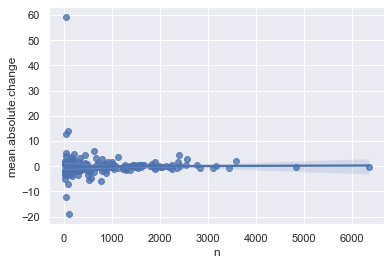

In [22]:
well_supported=change[change['p.adjust']<.05] #Filters out non-supported values
print(well_supported.shape) #Shape of filtered data.
sns.regplot(data=well_supported, x='n', y='mean.absolute.change') #Creates a regression plot of the data

- Interpret the plot: how does the plot allow you to assess your hypothesis? What do you conclude by looking at this.
    - The linear regression line has a slope of roughly 0. From this we can conclude there is little relation of the number of times a species was counted in a plot (n) and the mean.absolute.change. This would support the null hypothesis that there is no correlation.

- Model: follow up on your visualization with  model of the data
    - What feature(s) are you modeling and why is this model appropriate for that? 
        - The mean.absolute.change vs number of plots counted (n) for a species in a linear model. Apropriate because we have a continuous number of plots and mean.absolute.change values.
    - What other feature(s) are used in the model, if any, and why are they included?
        - I filtered by p-val<.05 to get rid of lowly confident results.
    - Describe what model you intend to make and why: how will this model inform your hypothesis. What kind of parameters do you expect for your model, based on your visualization?
        - A linear model which which will allow me to view the trend in mean absolute change vs general speciesi abundance. I expect the model to have a slope of near 0 and a y-int of near 0.
    - Provide code to run the model and view the numerical results. Again, the code should both work as written, and be explained. 


In [23]:
import statsmodels.api as sm #imports required package
tomodel=change.loc[:,['n', 'mean.absolute.change']] #Adds n and mean.absolute.change to the model
tomodel=sm.add_constant(tomodel) #Adds a constant to model for y-int
x=tomodel.loc[:,['const', 'n']] #Creates the x as the number of plots (n) and a constant 
y=tomodel['mean.absolute.change'] #y is how the mean.absolute.change varies in relation to x
plots_change_lm=sm.OLS(y, x).fit() #Creates a line of fit for the data
print(plots_change_lm.summary()) #Prints summary of the line

                             OLS Regression Results                             
Dep. Variable:     mean.absolute.change   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                  0.002836
Date:                  Wed, 14 Dec 2022   Prob (F-statistic):              0.958
Time:                          20:58:01   Log-Likelihood:                -5277.3
No. Observations:                  1794   AIC:                         1.056e+04
Df Residuals:                      1792   BIC:                         1.057e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0977      0.117

- Interpret the numerical results of the model:
    - What can we conclude about the parameters of the model, and how certain/uncertain are we about them. 
        - From the slope ('n') we can conclude that for every 1 plot a species is counted in, we expect to see a 9.396e-06 increase in species change. This is a negligable change (essentially 0), and the p-value is extremely high (.958) which would mean we cannot reject the null hypothesis, and that it is actually probable (although a p-val of 1 does not mean the null hypothesis is correct). 
        - From the y-intercept ('const') we can conclude that we expect a -.0977 species change when it's counted in 0 plots, which isn't possible for this dataset, but this is an extention of the model, so allows us to interpret low-abundance species. We are  not highly confident in this though as the p-value is .405 which is a weak confidence measure. 
    - What conclusions can we make about the research question based on the model results?
        - We originally predicted that there would be a negative relationship between the numebr of plots a species was counted in ('n') and the overall species change, as we expected originally abundant species to do poor, however this hypothesis can be rejected, as the slope is closer to 0 and not negative. Additionally there is no correlation (R^2=0) between the two features, which would further reject a negative relationship.

-------------
-------------

<header>
    <h1>Part 4</h1>

Target 1: Best way to estimate absolute change based on abundance in plots.

1. absolute change vs 'pos'/'neg'
2. absolute change vs 'n'/'equal'

Target 2: Best way to estimate a single species (Meum athamanticum) change within a plot based on other species changes in the same year.

1. change (within yr) spp A vs change (within yr) spp B
2. change (within yr) spp A vs change (within yr) spp C
3. change (within yr) spp A vs change (within yr) spp B/C
4. change (within yr) spp A vs change (within yr) spp D/E

<big><big><big>Question 1

- Research Question: How can we model the abundance change of species based on its performance in various plots? (i.e. Does the number of plots it's counted affect the change?)

- Describe the feature you are creating a regression model for and why you think making a linear model of this feature will help answer your research question. I will call this feature you are trying to model the target feature. Note, if it's the same as what you did in part 3, you can just state that this is the same.
    - I'm modelling the 'mean absolute change' as a function of the number of plots a species was counted in. I will first model the 'mean absolute change' as a function of the number of plots it had a positive change in ('pos') with the number of plots it was negative in ('neg'). I will also look at commonness by proxy of 'n' (the number of plots the species was counted in) with 'equal' (the number of plots the species had no change). A linear model will help me address and predict the relation on if the 'mean absolute change' is expected to differ based on the ammount of times a species was counted (it's commonness).

- Explain how fitting this model can inform your hypothesis: what specific question are you asking with this model? 
    - The specific question I'm asking is will a plants abundance change based on the number of plots it was counted having a positive or negative change in. This will allow us to anticipate how a species abundance changes based on the ratio of plot changes it has.

In [24]:
import statsmodels.api as sm #imports required package
tomodel=change.loc[:,['pos','neg', 'mean.absolute.change']] #Adds equal and mean.absolute.change to the model
tomodel=sm.add_constant(tomodel) #Adds a constant to model for y-int
x=tomodel.loc[:,['const', 'pos', 'neg']] #Creates the x as the number of positive plots (pos) and a constant 
y=tomodel['mean.absolute.change'] #y is how the mean.absolute.change varies in relation to x
plots_change_lm=sm.OLS(y, x).fit() #Creates a line of fit for the data
print(plots_change_lm.summary()) #Prints summary of the line

                             OLS Regression Results                             
Dep. Variable:     mean.absolute.change   R-squared:                       0.011
Model:                              OLS   Adj. R-squared:                  0.010
Method:                   Least Squares   F-statistic:                     9.735
Date:                  Wed, 14 Dec 2022   Prob (F-statistic):           6.24e-05
Time:                          20:58:01   Log-Likelihood:                -5267.6
No. Observations:                  1794   AIC:                         1.054e+04
Df Residuals:                      1791   BIC:                         1.056e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0823      0.116

- Interpret the results of the model: what can we conclude about the parameters and how certain are we about them? 
    - From these parameters, we can see when there is a lack of a count in either 'pos' or 'neg', we expect a 'mean absolute change' of -0.0823 ('const'/y-int), however the p-value is 0.479 which is a very weak confidence measure. When there is 1 increase in 'pos' plots, we expect to see a .0075 increase in the 'mean absolute change', which is strongly supported by a p-value of 0. When there is an increase of 1 in 'neg' plots, we expect to see a decrease of -.0073 in 'mean absolute change', which is again strongly supported by a p-value of 0.
- Explain the result in everyday language and the conclusions for your research question.
    - If the species is counted as having a positive change in a plot, we expect a correlated .0075 increase in the overall change of the species. If the species is counted as having a negative change in a plot, we expect to see a correlated -.0073 decrease in overall change of that species.
        - i.e. When 'pos' increases, 'mean absolute change' for the species increases. When 'neg' increases, 'mean absolute change' for the species decreases.

- Explain how fitting this model can inform your hypothesis: what specific question are you asking with this model? 
    - The question I'm asking will be how is a species abundance change affected by the number of plots it's counted in ('n', similar to part 3) as well the number of plots it was counted as having no change in ('equal'). This will allow me to model how abundance effects a species change (If a species gets less common if it was more abundant, we would see a negative slope).

In [25]:
import statsmodels.api as sm #imports required package
tomodel=change.loc[:,['n','equal', 'mean.absolute.change']] #Adds n, equal, and mean.absolute.change to the model
tomodel=sm.add_constant(tomodel) #Adds a constant to model for y-int
x=tomodel.loc[:,['const', 'equal', 'n']] #Creates the x as the number of plots ('n'), plots with no change ('equal'), and a constant 
y=tomodel['mean.absolute.change'] #y is how the mean.absolute.change varies in relation to x
plots_change_lm=sm.OLS(y, x).fit() #Creates a line of fit for the data
print(plots_change_lm.summary()) #Prints summary of the line

                             OLS Regression Results                             
Dep. Variable:     mean.absolute.change   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                   0.02522
Date:                  Wed, 14 Dec 2022   Prob (F-statistic):              0.975
Time:                          20:58:01   Log-Likelihood:                -5277.2
No. Observations:                  1794   AIC:                         1.056e+04
Df Residuals:                      1791   BIC:                         1.058e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.117

- Interpret the results of the model: what can we conclude about the parameters and how certain are we about them? 
    - The two combined features of commonness ('n' and 'equal') have no correlation in how 'mean absolute change' differs (both have a coefficient near 0). We are confident in this result because the seperate values had identical results, and they have low standard error.
    - From the parameters, we expect the species mean absolute change to be -.0970 when there is no plot it's counted in and no plot it had no change in (this wouldn't be possible though realistically), and we are not confident in this because the p-value of .409 is not a strong confidence measure. Additionally for both 'n' and 'equal' we expect little change in species mean absolute change as the slope for each is 9.375e-05 and -0.0003 respectively, which is supported by a high p-value of .825 and .827 respectively indicating the slopes are close to 0.
- Explain the result in everyday language and the conclusions for your research question.
    - There is no relationship between the commonness of a species ('n'/'equal' as proxies) and how the 'mean absolute change' differs over time.

- Compare your two models to each other using at least 2 model metrics and explain which model is the best predictor of the target feature.
    1. Log-Likelihood: The 1st model (using 'pos'/'neg') has a log-likelihood of -5267.6, while the 2nd model (using 'n'/'equal') has a log-likelihood of -5277.2. Based on these results, the 1st one has a value closer to 0, which would have us expect it to be a better predictor of a species mean absolute change.
    2. R-squared: The 1st model (using 'pos'/'neg') has a R-Squared of 0.011, while the 2nd model (using 'n'/'equal') has a R-squared of 0. Based on these results, the 1st one accounts for more variation, which would lead us to predict it to be a stronger indicating model.

<big><big><big>Question 2

- Research Question: How can we predict the abundance change of a specific species based on ecosystem changes?

- Describe the feature you are creating a regression model for and why you think making a linear model of this feature will help answer your research question. I will call this feature you are trying to model the target feature. 
    - The target feature I want to model is the abundance change of the species <i>Meum athamanticum</i> from year to year. This will be done using only 1 plot 'Wegener_Stiege_O' (see dataframe below), and will I will be basing it on the abundance change of other various species within the same year (Speices models: <i>Festuca rubra</i>; <i>Rhinanthus minor</i>; <i>Festuca rubra</i>+<i>Rhinanthus minor</i>; <i>Poa chaixii</i>+<i>Trifolium pratense</i>). This will help me answer my research question as the linear model will be a predictor of how a specific species abundance changes in relation to how other species abundance changes. (i.e. if one species is becomes more abundant, does the model species also become more abundant)

In [26]:
#Impractical to do this for all plots -- but can do it for one plot
Wegener_plot=species_change_list2[species_change_list2['RS_PROJECT'].str.contains('Wegener')] #Subsetting the plot (only 1) that was studied in the Wegener project
Wegener_plot.head() #Prints for visibilty

,RS_PROJECT,RS_PLOT,from.n,to.n,from,to,species,absolute.change,relative.change,relative.rank.change,absolute.change.colonizer,absolute.change.extinct,mid.year,decade,end.decade,slope,RS_PROJECT_PLOT
326778,Wegener_Stiege,O,1,1,2015,2016,Agrostis capillaris,2.0,0.111111,-0.017241,NaN,NaN,2016,2010,2010,0.111111,Wegener_Stiege_O
326779,Wegener_Stiege,O,1,1,2015,2016,Alchemilla vulgaris agg.,0.0,0.000000,-0.034483,NaN,NaN,2016,2010,2010,0.000000,Wegener_Stiege_O
326780,Wegener_Stiege,O,1,1,2015,2016,Anemone nemorosa,0.0,0.000000,-0.034483,NaN,NaN,2016,2010,2010,0.000000,Wegener_Stiege_O
326781,Wegener_Stiege,O,1,1,2015,2016,Anthoxanthum odoratum agg.,1.0,0.100000,-0.051724,NaN,NaN,2016,2010,2010,0.100000,Wegener_Stiege_O
326782,Wegener_Stiege,O,1,1,2015,2016,Arrhenatherum elatius,0.0,0.000000,-0.034483,NaN,NaN,2016,2010,2010,0.000000,Wegener_Stiege_O


In [27]:
spp_df=pd.DataFrame(Wegener_plot['species'].unique()) #Getting list of unique species within the plot
new_df=pd.DataFrame() #Creates a new df we add to in the loop below
for i in range(len(Wegener_plot['species'].unique())): #Iterating through each unique species
    spp=Wegener_plot['species'].unique()[i] #Grabbing the species name
    abs_change=[] #List of this species change for each year it's documented
    from_year=[] #Gets the early year in the comparison
    to_year=[] #Gets the later list in the comparison
    for j in range(len(Wegener_plot['from'].unique())): #Iterates through every year the plot was documented
        low_year=Wegener_plot['from'].unique()[j] #Gets the lower year of the comparison (e.g. 2015 in head)
        from_year.append(low_year) #Appends it to the from_year list
        high_year=Wegener_plot['to'].unique()[j] #Gets the higher year comparison (e.g. 2016 in head)
        to_year.append(high_year) #Appends it to the to_year list
        subset=Wegener_plot[(Wegener_plot['species']==spp) & (Wegener_plot['from']==low_year) & (Wegener_plot['to']==high_year)] #Subsets the plot dataframe based on if it's the species we want, and if it's the years we're comparing.
        if subset.shape[0]>0: #If there's actually data in the dataframe;
            abs_change.append(subset['absolute.change'].values[0]) #Append the abslute change values to the abs_change list
        else: #If there's no data in the dataframe (i.e. it wasn't counted in the plot in both years);
            abs_change.append(0) #Make it  0 (going from 0 to 0) -- This probably isn't proper statistical modelling, but it's the easiest way to make this work.
    new_df['to_year']=to_year #Creates a column in the df of the years (does it for each loop, but it'll be the same every time)
    new_df[spp]=abs_change #Adds the absolute change of the species under a column with it's name
new_df=new_df.set_index('to_year') #Sets the index to the year being measured (just to_year for simplicity. For example, it would be from 2015-2016 in the head, but it will just be displayed as 2016.
new_df.head() #Prints for visability

,Agrostis capillaris,Alchemilla vulgaris agg.,Anemone nemorosa,Anthoxanthum odoratum agg.,Arrhenatherum elatius,Briza media,Campanula rotundifolia agg.,Cardamine pratensis agg.,Carex caryophyllea,Crepis mollis,...,Botrychium lunaria,Cynosurus cristatus,Festuca ovina agg.,Achillea millefolium agg.,Helictotrichon pubescens,Saxifraga granulata,Deschampsia flexuosa,Vicia sepium,Poa trivialis,Bistorta officinalis
to_year,,,,,,,,,,,,,,,,,,,,,
2016,2.0,0.0,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,-1.0,0.0,0.0,0.5,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,2.0,0.0,0.0,-2.0,0.0,0.0,-0.5,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,-1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.5,-1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model 1

- Explain how fitting this model can inform your hypothesis: what specific question are you asking with this model? 
    - The specific question I'm asking is how will a change in abundance of <i>Festuca rubra</i> over the course of year affect the change of abundance of <i>Meum athamanticum</i> within the same year. I then look at this for the duration of the study (1954-2016 for this plot). Both species are grass-like species which may be occupying the same niche within the plot, which informs my hypothesis because it will help us understand how specific species interact.
        - i.e. If <i>Festuca rubra</i> increases and <i>Meum athamanticum</i> decreases within the same year (repeatedly from 1954-2016), we would expect to see a negative correlation.


In [28]:
import statsmodels.api as sm
to_model=pd.DataFrame({'AbsChange':new_df['Meum athamanticum'].values, #Adds the absolute change of target species
                       'Festuca rubra':new_df['Festuca rubra agg.']}) #Adds absolute change of other species
to_model=sm.add_constant(to_model) #Adds constant
x=to_model.loc[:,['const', 'Festuca rubra']] #x variable will be the constant and Festuca rubra
y=to_model['AbsChange'] #Absolute change of Meum athamanticum for the year will be the y variable
plots_change_lm=sm.OLS(y, x).fit() #Creates a line of fit for the data
print(plots_change_lm.summary()) #Prints summary of the line

                            OLS Regression Results                            
Dep. Variable:              AbsChange   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     7.055
Date:                Wed, 14 Dec 2022   Prob (F-statistic):             0.0105
Time:                        20:58:04   Log-Likelihood:                -128.76
No. Observations:                  54   AIC:                             261.5
Df Residuals:                      52   BIC:                             265.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5430      0.365      1.490

<AxesSubplot:xlabel='Festuca rubra agg.', ylabel='Meum athamanticum'>

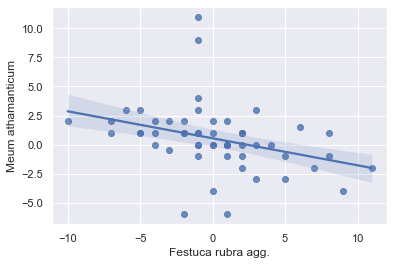

In [29]:
sns.regplot(y=new_df['Meum athamanticum'], x=new_df['Festuca rubra agg.']) #Just to generally visualize the model

- Interpret the results of the model: what can we conclude about the parameters and how certain are we about them? 
    - From these parameters, we can see that when there is no change in <i>Festuca rubra</i> ('const'/y-int) we expect to see an increase in abundance of 0.5430 in <i>Meum athamanticum</i>, which has a p-val of 0.142 which isn't great but not terrible either. We can also see that for every 1 unit of change abundance of <i>Festuca rubra</i>, we expect to see a -0.2323 unit change abundance in <i>Meum athamanticum</i> (slope), with a strong confidence in this relationship as the p-val is .01, meaning we are able to reject the slope is 0.
- Explain the result in everyday language. 
    - If the unit abundance of <i>Festuca rubra</i> goes up within a year, we expect a abundance corresponding change of -0.2323 for <i>Meum athamanticum</i>.

Model 2

- Explain how fitting this model can inform your hypothesis: what specific question are you asking with this model? 
    - The specific question I'm asking is how will a change in abundance of <i>Rhinanthus minor</i> over the course of year affect the change of abundance of <i>Meum athamanticum</i> within the same year. I then look at this for the duration of the study (1954-2016 for this plot). Both species are grass-like species which may be occupying the same niche within the plot, which informs my hypothesis because it will help us understand how specific species interact.
        - i.e. If <i>Rhinanthus minor</i> increases and <i>Meum athamanticum</i> decreases within the same year (repeatedly from 1954-2016), we would expect to see a negative correlation.


In [30]:
import statsmodels.api as sm
to_model=pd.DataFrame({'AbsChange':new_df['Meum athamanticum'].values, #Adds the absolute change of target species
                       'Rhinanthus minor':new_df['Rhinanthus minor']}) #Adds absolute change of other species
to_model=sm.add_constant(to_model) #Adds constant
x=to_model.loc[:,['const', 'Rhinanthus minor']] #x variable will be the constant and Festuca rubra
y=to_model['AbsChange'] #Absolute change of Meum athamanticum for the year will be the y variable
plots_change_lm=sm.OLS(y, x).fit() #Creates a line of fit for the data
print(plots_change_lm.summary()) #Prints summary of the line

                            OLS Regression Results                            
Dep. Variable:              AbsChange   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     13.26
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           0.000626
Time:                        20:58:04   Log-Likelihood:                -126.07
No. Observations:                  54   AIC:                             256.1
Df Residuals:                      52   BIC:                             260.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5630      0.347  

<AxesSubplot:xlabel='Rhinanthus minor', ylabel='Meum athamanticum'>

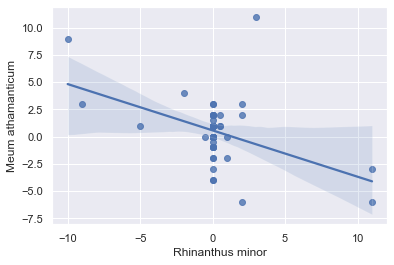

In [31]:
sns.regplot(y=new_df['Meum athamanticum'], x=new_df['Rhinanthus minor']) #Just to generally visualize the model

- Interpret the results of the model: what can we conclude about the parameters and how certain are we about them? 
    - From these parameters, we can see that when there is no change in <i>Rhinanthus minor</i> ('const'/y-int) we expect to see an increase in abundance of 0.5430 in <i>Meum athamanticum</i>, which has a p-val of 0.111 which isn't great (<.05) but not terrible either. We can also see that for every 1 unit of change abundance of <i>Rhinanthus minor</i>, we expect to see a -0.4254 unit change abundance in <i>Meum athamanticum</i> (slope), with a strong confidence in this relationship as the p-val is .001, meaning we are able to reject the slope is 0.
- Explain the result in everyday language. 
    - If the unit abundance of <i>Rhinanthus minor</i> goes up within a year, we expect a corresponding abundance change of -0.4254 for <i>Meum athamanticum</i> abundance.

- Compare your two models to each other using at least 2 model metrics and explain which model is the best predictor of the target feature.
    1. Log-Likelihood: The 1st model (using <i>Festuca rubra</i>) has a log-likelihood of -128.76, while the 2nd model (using <i>Rhinanthus minor</i>) has a log-lielihood of -126.07. From this metric the 2nd model is more likely, and thus we would expect it to be a better predictor of the abundance change of <i>Meum athamanticum</i>.
    2. R-squared: The 1st model (using <i>Festuca rubra</i>) has a R-squared of 0.119, while the 2nd model (using <i>Rhinanthus minor</i>) R-squared of 0.203. From this metric the 2nd model accounts for higher variation, and thus we would expect it to be a better predictor of the abundance change of <i>Meum athamanticum</i>.

Model 3 (2-variable)

In [32]:
import statsmodels.api as sm
to_model=pd.DataFrame({'AbsChange':new_df['Meum athamanticum'].values, #Adds the absolute change of target species
                       'Festuca rubra':new_df['Festuca rubra agg.'], #Adds absolute change of other species
                       'Rhinanthus minor':new_df['Rhinanthus minor']}) #Adds absolute change of other species
to_model=sm.add_constant(to_model) #Adds constant
x=to_model.loc[:,['const', 'Rhinanthus minor','Festuca rubra']] #x variable will be the constant, Rhinanthus minor, Festuca rubra
y=to_model['AbsChange'] #Absolute change of Meum athamanticum for the year will be the y-constant
plots_change_lm=sm.OLS(y, x).fit() #Creates a line of fit for the data
print(plots_change_lm.summary()) #Prints summary of the line

                            OLS Regression Results                            
Dep. Variable:              AbsChange   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     12.46
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.91e-05
Time:                        20:58:04   Log-Likelihood:                -121.45
No. Observations:                  54   AIC:                             248.9
Df Residuals:                      51   BIC:                             254.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6080      0.322  

- Interpret the results of the model: what can we conclude about the parameters and how certain are we about them? 
    - From these parameters, we can see that when there is no change in both <i>Rhinanthus minor</i> and <i>Festuca rubra</i> ('const'/y-int) we expect to see an increase in abundance of 0.6080 in <i>Meum athamanticum</i>, which has a p-val of 0.65 which is just below a good cutoff value of .05. We can also see that for every 1 unit of change abundance of <i>Rhinanthus minor</i>, we expect to see a -0.4314 unit change abundance in <i>Meum athamanticum</i> (slope), with a strong confidence in this relationship as the p-val is 0, meaning we are able to reject the slope is 0. Additionally or every 1 unit of change abundance of <i>Festuca rubra</i>, we expect to see a -0.2379 unit change abundance in <i>Meum athamanticum</i> (slope), with a strong confidence in this relationship as the p-val is .003, meaning we are able to reject the slope is 0.
- Explain the result in everyday language. 
    - If the unit abundance of either <i>Rhinanthus minor</i> or  <i>Festuca rubra</i>  goes up within a year, we expect a corresponding abundance change of-0.4314 or  -0.2379 for <i>Meum athamanticum</i>. 
        - i.e As <i>Rhinanthus minor</i> or  <i>Festuca rubra</i> take over more land within the plot, <i>Meum athamanticum</i> becomes less abundant within the plot

Model 4 (2-variable)

In [33]:
import statsmodels.api as sm
to_model=pd.DataFrame({'AbsChange':new_df['Meum athamanticum'].values, #Adds the absolute change of target species
                       'Poa chaixii':new_df['Poa chaixii'], #Adds absolute change of other species
                       'Trifolium pratense':new_df['Trifolium pratense']}) #Adds absolute change of other species
to_model=sm.add_constant(to_model) #Adds constant
x=to_model.loc[:,['const', 'Poa chaixii','Trifolium pratense']] #x variable will be the constant, Poa chaixii, Trifolium pratense
y=to_model['AbsChange'] #Absolute change of Meum athamanticum for the year will be the y-constant
plots_change_lm=sm.OLS(y, x).fit() #Creates a line of fit for the data
print(plots_change_lm.summary()) #Prints summary of the line

                            OLS Regression Results                            
Dep. Variable:              AbsChange   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.144
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.327
Time:                        20:58:04   Log-Likelihood:                -131.01
No. Observations:                  54   AIC:                             268.0
Df Residuals:                      51   BIC:                             274.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4797      0

- Interpret the results of the model: what can we conclude about the parameters and how certain are we about them? 
    - From these parameters, we can see that when there is no change in both <i>Poa chaixii</i> and <i>Trifolium pratense</i> ('const'/y-int) we expect to see an increase in abundance of 0.4797 in <i>Meum athamanticum</i>, which has a p-val of 0.217 which is not particularly strong meaning we cannot reject that there may be no change in  <i>Meum athamanticum</i> abundance when there is no change in the other species. We can also see that for every 1 unit of change abundance of <i>Poa chaixii</i>, we expect to see a -0.1860 unit change, however the p-value is 0.359 which is not a strong value we can have confidence in. Additionally or every 1 unit of change abundance of <i>Trifolium pratense</i>, we expect to see a -0.1860 unit change abundance in <i>Meum athamanticum</i> (slope), however the p-value is 0.195 which is again not a strong value that we can be confident in. Because both of these slopes are not statistically supported (both p-val >.05) we cannot confidently say there is a true change in <i>Meum athamanticum</i> abundance based on <i>Poa chaixii</i> and <i>Trifolium pratense</i> abundance changes.
- Explain the result in everyday language. 
    - If the unit abundance of either <i>Poa chaixii</i> or  <i>Trifolium pratense</i>  goes up within a year, we expect a corresponding abundance change of -0.2224 or  -0.1860 for <i>Meum athamanticum</i>. 
        - i.e As <i>Poa chaixii</i> or  <i>Trifolium pratense</i> take over more land within the plot, <i>Meum athamanticum</i> becomes less abundant within the plot

- Compare your two models to each other using at least 2 model metrics and explain which model is the best predictor of the target feature.
    1. Log-Likelihood: The 1st model (using <i>Rhinanthus minor</i> and <i>Festuca rubra</i>) has a log-likelihood of -121.45, while the 2nd model (using <i>Poa chaixii</i> or  <i>Trifolium pratense</i>) has a log-likelihood of -131.01. Because the 1st model is closer to 0, we expect this to be a more accurate predictor for abundance change of <i>Meum athamanticum</i>.
    2. R-squared: The 1st model (using <i>Rhinanthus minor</i> and <i>Festuca rubra</i>) has a R-squared of 0.328, while the 2nd model (using <i>Rhinanthus minor</i>) R-squared of 0.043. From this metric the 1st model accounts for higher variation, and thus we would expect it to be a better predictor of the abundance change of <i>Meum athamanticum</i>.